## Plot Solutions to Time-dependent Schrodinger Equation

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.special import hermite

In [36]:
def read_wavefunction_file(filename):
    with open(filename) as f:
        data = f.readlines()

    # get the x and t grids
    x_grid = np.array(data[0].split()[3:], dtype=float)
    t_grid = np.array(data[1].split()[3:], dtype=float)
    
    # get wavefunction
    wavefunction = np.zeros((len(x_grid), len(t_grid)))

    for i in range(len(t_grid)):
        wavefunction[:, i] = np.array(data[i + 2].split(), dtype=float)

    return x_grid, t_grid, wavefunction

In [37]:
plot_dir = f"..{os.sep}plots"

## Load data

In [38]:
filename = "../solution.txt"

In [39]:
x_grid, t_grid, wavefunction = read_wavefunction_file(filename)

## Plot Wavefunction

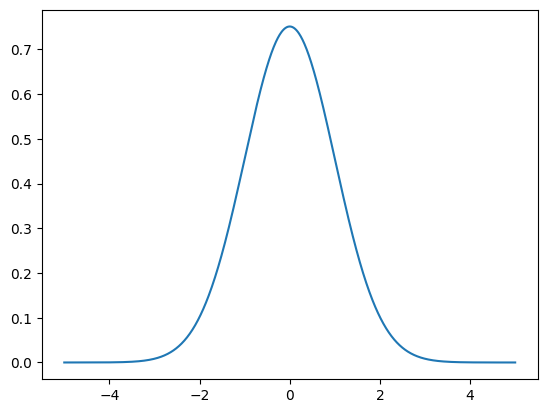

In [49]:
plt.plot(x_grid, wavefunction[:, 0]);

In [51]:
np.linalg.norm(wavefunction[:, 0])

9.994998749367316